# Introduction

### Preparing for libralies and commands

In [1]:
# Import required libralies

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

### Initial setting

In [2]:
# Change default font size
plt.rcParams['font.size'] = 14

# Ignore warning signs
import warnings
warnings.simplefilter('ignore')

In [3]:
# Device allocation (Chapter 8)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
# Load common function (Capter 9)

# Download common function
!git clone https://github.com/makaishi2/pythonlibs.git

# Load common function
from pythonlibs.torch_lib1 import *

# Existance check for common function
print(README)

fatal: destination path 'pythonlibs' already exists and is not an empty directory.
Common Library for PyTorch
Author: M. Akaishi


### Load training data

In [5]:
# Load training data (Chapter 12)

# Dowmload training images
w = !wget https://github.com/makaishi2/pythonlibs/raw/main/images/dog_wolf.zip
print(w[-2])

# Unzip training images
w = !unzip dog_wolf.zip
print(w[-1])

# Set directory name
data_dir = 'dog_wolf'

# Set train and test directory name
import os
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')

# Set class names
classes = ['dog', 'wolf']

# Show tree of dog-wolf images
!tree dog_wolf

2023-07-16 18:16:44 (15.1 MB/s) - `dog_wolf.zip.1' へ保存完了 [21811374/21811374]
(EOF or read error, treating as "[N]one" ...)
dog_wolf
├── test
│   ├── dog
│   │   ├── dog-21.png
│   │   ├── dog-22.png
│   │   ├── dog-23.png
│   │   ├── dog-24.png
│   │   └── dog-25.png
│   └── wolf
│       ├── wolf-21.png
│       ├── wolf-22.png
│       ├── wolf-23.png
│       ├── wolf-24.png
│       └── wolf-25.png
└── train
    ├── dog
    │   ├── dog-01.png
    │   ├── dog-02.png
    │   ├── dog-03.png
    │   ├── dog-04.png
    │   ├── dog-05.png
    │   ├── dog-06.png
    │   ├── dog-07.png
    │   ├── dog-08.png
    │   ├── dog-09.png
    │   ├── dog-10.png
    │   ├── dog-11.png
    │   ├── dog-12.png
    │   ├── dog-13.png
    │   ├── dog-14.png
    │   ├── dog-15.png
    │   ├── dog-16.png
    │   ├── dog-17.png
    │   ├── dog-18.png
    │   ├── dog-19.png
    │   └── dog-20.png
    └── wolf
        ├── wolf-01.png
        ├── wolf-02.png
        ├── wolf-03.png
        ├── wolf-04.png
        

In [6]:
# Prepare for training data (Chapter 8, 10, 12)

# Definition of transform
# Set for test data: nomalization only 
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# Set for trainig data: nomalization, reverse and RandomErasing
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)   
])

# Definition of datasets
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)
test_data = datasets.ImageFolder(test_dir, transform=test_transform)

# Definition of dataloader
batch_size = 5
#train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=False)
test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)


### Show the training images

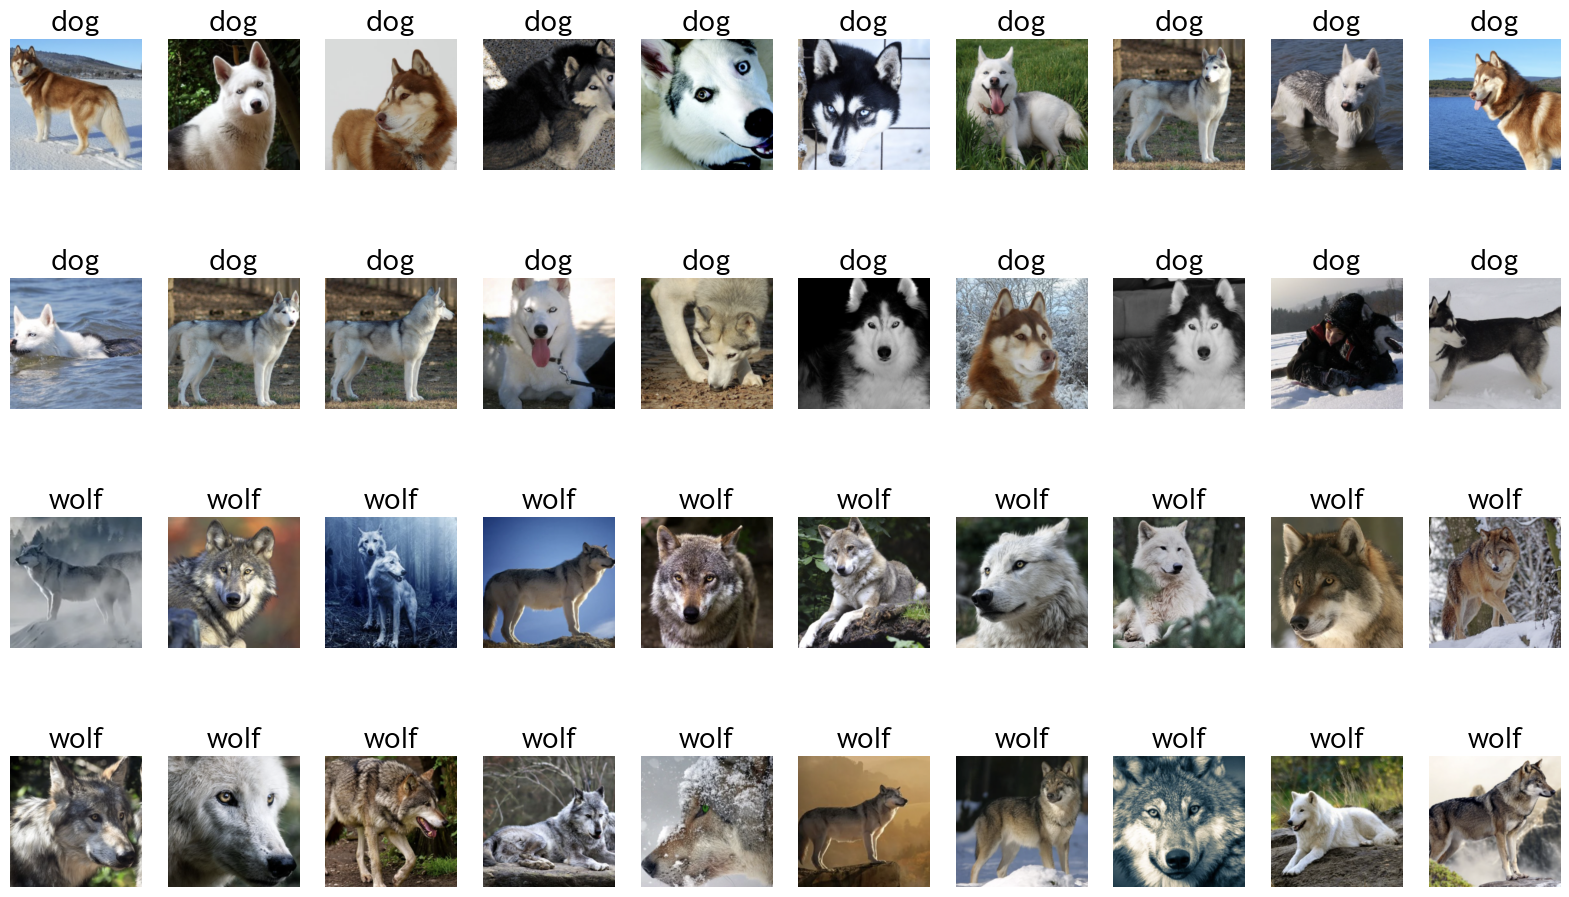

In [7]:
# Training data (40 images)
show_images_labels(train_loader2, classes, None, None)

### Show the test images

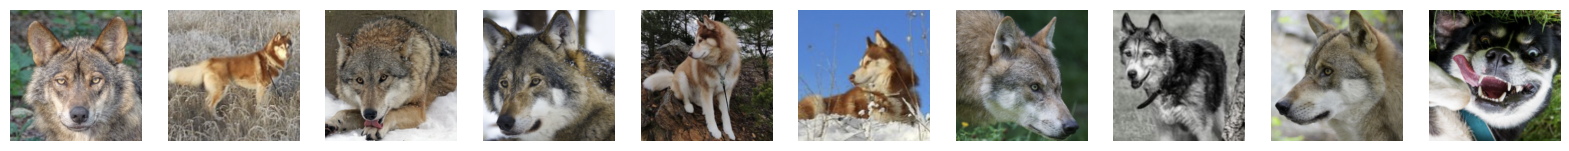

In [8]:
# Test data (10 images)
# First, show only the images without the correct answer
# Judge for yourself whether each image is of a dog or a wolf
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

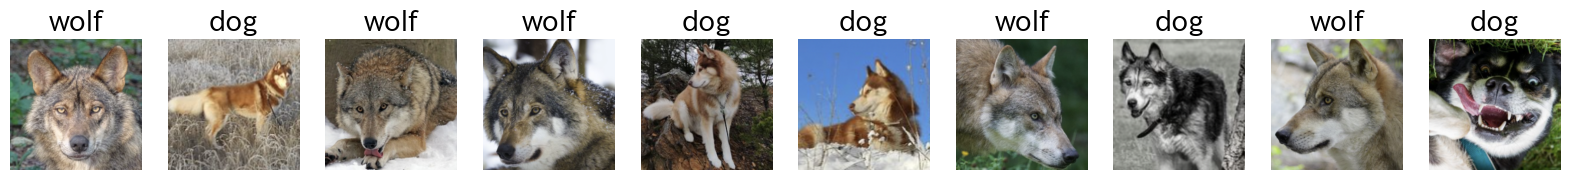

In [9]:
# Test data (10 images)
# This shows correct answer
# How many of the 10 images did you answer correctly?
torch_seed()
show_images_labels(test_loader2, classes, None, None)

### Model construction

In [10]:
# Model construction using pre-trained model (Chapter 10)

# load pre-trained model
from torchvision import models
net = models.vgg19_bn(pretrained = True)

# Set required_grad flag to False for transfer learning
for param in net.parameters():
    param.requires_grad = False

# Initialize ramdom numbers
torch_seed()

# Set the output of final node to 2
in_features = net.classifier[6].in_features
net.classifier[6] = nn.Linear(in_features, 2)

# Remove AdaptiveAvgPool2d function
net.avgpool = nn.Identity()

# Set use of GPU
net = net.to(device)

# Training rate
lr = 0.001

# Use cross entropy for loss function
criterion = nn.CrossEntropyLoss()

# Definition of optimization function 最適化関数の定義

# Limit parameter modification to final node
optimizer = optim.SGD(net.classifier[6].parameters(),lr=lr,momentum=0.9)

# Initialize history file
history = np.zeros((0, 5))

In [11]:
# Run training (Chapter 9)

# Set the number of repetitions
num_epochs = 10

# training (common function)
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [1/10], loss: 0.61454 acc: 0.75000 val_loss: 0.38611, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [2/10], loss: 0.28818 acc: 0.90000 val_loss: 0.28590, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [3/10], loss: 0.21766 acc: 0.90000 val_loss: 0.16600, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [4/10], loss: 0.10558 acc: 0.95000 val_loss: 0.18823, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [5/10], loss: 0.08623 acc: 0.97500 val_loss: 0.16863, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [6/10], loss: 0.14394 acc: 0.97500 val_loss: 0.15020, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [7/10], loss: 0.06082 acc: 1.00000 val_loss: 0.13804, val_acc: 1.00000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [8/10], loss: 0.10731 acc: 0.97500 val_loss: 0.18357, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [9/10], loss: 0.04853 acc: 1.00000 val_loss: 0.23736, val_acc: 0.90000


  0%|          | 0/8 [00:00<?, ?it/s]

Epoch [10/10], loss: 0.05934 acc: 1.00000 val_loss: 0.26162, val_acc: 0.80000


### Result confirmation

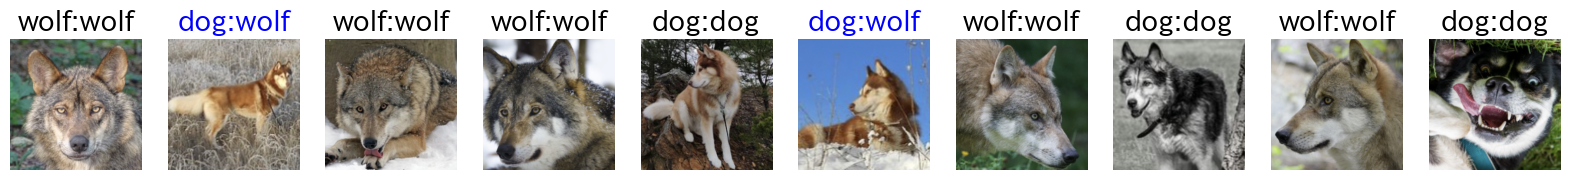

In [12]:
# Confirmation of results for test data (Chapter 9 common function)
torch_seed()
show_images_labels(test_loader2, classes, net, device)

### (Ref)　Detail of common function

In [13]:
# Function for training
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        train_loss = 0
        train_acc = 0
        val_loss = 0
        val_acc = 0

        # Start training
        net.train()
        count = 0

        for inputs, labels in tqdm(train_loader):
            count += len(labels)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Initialization of gradient
            optimizer.zero_grad()

            # Prediction calculation
            outputs = net(inputs)

            # loss calculation
            loss = criterion(outputs, labels)
            train_loss += loss.item()

            # gradient calculation
            loss.backward()

            # modify the parameter
            optimizer.step()

            # Predicted value calculation
            predicted = torch.max(outputs, 1)[1]

            # Number of correct answers calculation
            train_acc += (predicted == labels).sum()

            # Calculation of loss and accuracy
            avg_train_loss = train_loss / count
            avg_train_acc = train_acc / count

        # Start prediction
        net.eval()
        count = 0

        for inputs, labels in test_loader:
            count += len(labels)

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Prediction calculation
            outputs = net(inputs)

            # loss calculation
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            # predicted value calculation
            predicted = torch.max(outputs, 1)[1]

            # Number of correct answers calculation
            val_acc += (predicted == labels).sum()

            # Calculation of loss and accuracy
            avg_val_loss = val_loss / count
            avg_val_acc = val_acc / count
    
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {avg_train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {avg_val_acc:.5f}')
        item = np.array([epoch+1, avg_train_loss, avg_train_acc, avg_val_loss, avg_val_acc])
        history = np.vstack((history, item))
    return history


In [14]:
# Show images and labels
def show_images_labels(loader, classes, net, device):

    # Get first set from DataLoader 
    for images, labels in loader:
        break
    # The number of displayed images is 50 and the smaller of the batch size
    n_size = min(len(images), 50)

    if net is not None:
      # Set device
      inputs = images.to(device)
      labels = labels.to(device)

      # Prediction calculation
      outputs = net(inputs)
      predicted = torch.max(outputs,1)[1]
      #images = images.to('cpu')

    # Show the first n_size
    plt.figure(figsize=(20, 15))
    for i in range(n_size):
        ax = plt.subplot(5, 10, i + 1)
        label_name = classes[labels[i]]
        # Show the result of prediction if net isn't None
        if net is not None:
          predicted_name = classes[predicted[i]]
          # Color-code whether the answer is cottect or not
          if label_name == predicted_name:
            c = 'k'
          else:
            c = 'b'
          ax.set_title(label_name + ':' + predicted_name, c=c, fontsize=20)
        # Show only corect labels if net is None
        else:
          ax.set_title(label_name, fontsize=20)
        # Transform Tensor to NumPy
        image_np = images[i].numpy().copy()
        # Change axis order (channel, row, column) -> (row, column, channel)
        img = np.transpose(image_np, (1, 2, 0))
        # Revert the range of value to [-1, 1] -> [0, 1]
        img = (img + 1)/2
        # Show results
        plt.imshow(img)
        ax.set_axis_off()
    plt.show()


In [15]:
# For fixing random numbers of PyTorch

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.use_deterministic_algorithms = True
